https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
#from torch import nn
#from torch import optim
#import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
import time
from torchvision.models import resnet18

##Load Dataset

In [3]:
data_dir = '/content/drive/MyDrive/datasetlight'
batch_size = 16

def load_split_train_test(datadir, valid_size = .2, batch_size = batch_size):
    train_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),])    
    test_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),])    
    
    train_data = datasets.ImageFolder(datadir, transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,transform=test_transforms)    
    
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

 
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=batch_size)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=batch_size)
    return trainloader, testloader

trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)
print(f'{len(trainloader.dataset.classes)} classes in total')
print(f'{len(trainloader)} train loaders')
print(f'{len(testloader)} test loaders')

['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
11 classes in total
48 train loaders
12 test loaders


##Show Dataset



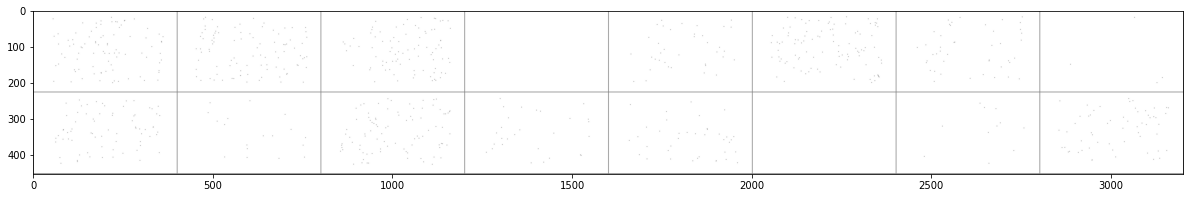

81-90 91-100 81-90     0 31-40 91-100 41-50  1-10 71-80 11-20 81-90 21-30 31-40     0 11-20 51-60


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.figure(figsize = (30,3))
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % trainloader.dataset.classes[labels[j]] for j in range(batch_size)))

##Define CNN Model

In [5]:

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(81408, 2000)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 11)
        self.fc2 = nn.Linear(2000, 50)
        self.fc3 = nn.Linear(50, 11)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


#net = Net()
net = resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


##Define and Loss function and optimizer 

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

##Train the model

In [7]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    start = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % len(trainloader) == len(trainloader) -1:    # print every loss for every epoch 
            end = time.time()
            elapsed = end - start
            print(f'epoch: {epoch}, loss: {running_loss}, time: {elapsed}')
            

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 0, loss: 132.37446081638336, time: 461.86966252326965
epoch: 1, loss: 87.71870851516724, time: 213.0658459663391
epoch: 2, loss: 75.72242712974548, time: 212.61430525779724
epoch: 3, loss: 78.01284164190292, time: 210.73140621185303
epoch: 4, loss: 64.45018190145493, time: 208.62784147262573
epoch: 5, loss: 56.66025669872761, time: 209.30922293663025
epoch: 6, loss: 64.52488198876381, time: 206.3618869781494
epoch: 7, loss: 40.0370669066906, time: 208.36302971839905
epoch: 8, loss: 32.863470777869225, time: 203.59561276435852
epoch: 9, loss: 24.75865837931633, time: 202.27053999900818
Finished Training


###save the trained model

In [8]:
PATH = './Dots.pth'
torch.save(net.state_dict(), PATH)

#Test the model

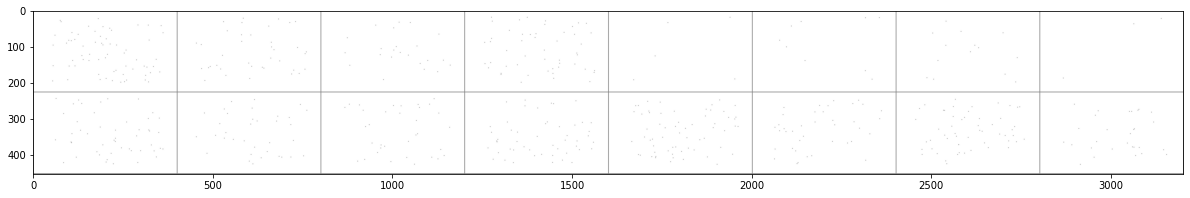

GroundTruth:  61-70 31-40 21-30 41-50  1-10  1-10 11-20  1-10 41-50 31-40 31-40 41-50 61-70 31-40 51-60 21-30


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
plt.figure(figsize = (30,3))
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % testloader.dataset.classes[labels[j]] for j in range(batch_size)))

In [10]:
#net = resnet18(pretrained=True) 
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

#fix it
print('Predicted: ', ' '.join('%5s' % testloader.dataset.classes[predicted[j]]
                              for j in range(batch_size)))

Predicted:  81-90 51-60 41-50 61-70  1-10  1-10 11-20  1-10 61-70 41-50 31-40 81-90 91-100 61-70 61-70 31-40


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 56 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in trainloader.dataset.classes}
total_pred = {classname: 0 for classname in trainloader.dataset.classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, predicted in zip(labels, predicted):
            if label == predicted:
                correct_pred[trainloader.dataset.classes[label]] += 1
            total_pred[trainloader.dataset.classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class 0     is: 0.0 %
Accuracy for class 1-10  is: 95.0 %
Accuracy for class 11-20 is: 73.7 %
Accuracy for class 21-30 is: 44.4 %
Accuracy for class 31-40 is: 45.0 %
Accuracy for class 41-50 is: 23.5 %
Accuracy for class 51-60 is: 35.0 %
Accuracy for class 61-70 is: 47.1 %
Accuracy for class 71-80 is: 33.3 %
Accuracy for class 81-90 is: 60.7 %
Accuracy for class 91-100 is: 87.5 %


###ToDo

- use resnet
- make your own layers
- plot trainig and validation loss to stop overtraining
- learning rate finder
- confusion matrix
- transform images to create more dataset
- use pl.LightningModule

- https://d2l.ai/chapter_convolutional-neural-networks/channels.html
- https://www.pluralsight.com/guides/introduction-to-resnet 